<a href="https://colab.research.google.com/github/kelvinsima2/Cybersecurity-Data-Science/blob/main/CICDDoS2019_Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preamble

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 102 kB/s 


## Data Retrieval from Drive

In [ ]:
# Connect to drive
# Code adapted from [21COP528 Lab 8 ]
from google.colab import drive
drive.mount('/content/drive',force_remount=True)



Mounted at /content/drive


In [ ]:
# Define path for csv files in CICDDoS2019
# Date 1-12
path_DNS_112 = 'drive/My Drive/Data Science Project/CICDDoS2019/01-12/DrDoS_DNS.csv'
path_LDAP_112 = 'drive/My Drive/Data Science Project/CICDDoS2019/01-12/DrDoS_LDAP.csv'
path_SQL_112 = 'drive/My Drive/Data Science Project/CICDDoS2019/01-12/DrDoS_MSSQL.csv'
path_NETBIOS_112 = 'drive/My Drive/Data Science Project/CICDDoS2019/01-12/DrDoS_NetBIOS.csv'
path_NTP_112 = 'drive/My Drive/Data Science Project/CICDDoS2019/01-12/DrDoS_NTP.csv'
path_SNMP_112 = 'drive/My Drive/Data Science Project/CICDDoS2019/01-12/DrDoS_SNMP.csv'
path_SSDP_112 = 'drive/My Drive/Data Science Project/CICDDoS2019/01-12/DrDoS_SSDP.csv'
path_UDP_112 = 'drive/My Drive/Data Science Project/CICDDoS2019/01-12/DrDoS_UDP.csv'
path_SYN_112 = 'drive/My Drive/Data Science Project/CICDDoS2019/01-12/Syn.csv'
path_TFTP_112 = 'drive/My Drive/Data Science Project/CICDDoS2019/01-12/TFTP.csv'
path_UDPlag_112 = 'drive/My Drive/Data Science Project/CICDDoS2019/01-12/UDPLag.csv'

# Date 3-11
path_LDAP_311 = 'drive/My Drive/Data Science Project/CICDDoS2019/03-11/LDAP.csv'
path_SQL_311 = 'drive/My Drive/Data Science Project/CICDDoS2019/03-11/MSSQL.csv'
path_NETBIOS_311 = 'drive/My Drive/Data Science Project/CICDDoS2019/03-11/NetBIOS.csv'
path_PORTMAP_311 = 'drive/My Drive/Data Science Project/CICDDoS2019/03-11/Portmap.csv'
path_SYN_311 = 'drive/My Drive/Data Science Project/CICDDoS2019/03-11/Syn.csv'
path_UDP_311 = 'drive/My Drive/Data Science Project/CICDDoS2019/03-11/UDP.csv'
path_UDPlag_311 = 'drive/My Drive/Data Science Project/CICDDoS2019/03-11/UDPLag.csv'

In [ ]:
pip install skimpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 6.8 MB/s 
     |████████████████████████████████| 214 kB 70.8 MB/s 
     |████████████████████████████████| 51 kB 5.3 MB/s 
  Attempting uninstall: Pygments
    Found existing installation: Pygments 2.6.1
    Uninstalling Pygments-2.6.1:
      Successfully uninstalled Pygments-2.6.1
  Attempting uninstall: typeguard
    Found existing installation: typeguard 2.7.1
    Uninstalling typeguard-2.7.1:
      Successfully uninstalled typeguard-2.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.


In [ ]:
# import libraries
import pandas as pd
import numpy as np
from skimpy import clean_columns

# CICDDoS2019 Dataset

In [ ]:
# Takes 9min to run
# [Code adapted from https://stackoverflow.com/questions/22258491/read-a-small-random-sample-from-a-big-csv-file-into-a-python-data-frame]
import random
random.seed(42)
df_dict = {}
path_list = [path_DNS_112, path_LDAP_112, path_SQL_112, path_NETBIOS_112, path_NTP_112, path_SNMP_112, 
            path_SSDP_112, path_UDP_112, path_SYN_112, path_TFTP_112, path_UDPlag_112, path_LDAP_311, 
            path_SQL_311, path_NETBIOS_311, path_PORTMAP_311, path_SYN_311, path_UDP_311, path_UDPlag_311]

for path in path_list:
  n = sum(1 for line in open(path)) - 1 #number of records in file (excludes header)
  s = int(n*0.01)#desired sample size (10% of the population size)
  skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
  df_dict[path] = pd.read_csv(path, skiprows = skip)



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (85) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Clean Data

In [ ]:
# Clean column names
df_CICDDoS2019 = clean_columns(pd.concat(df_dict[path] for path in path_list))

In [ ]:
# Display first 5 lines
df_CICDDoS2019.head()

,unnamed_0,flow_id,source_ip,source_port,destination_ip,destination_port,protocol,timestamp,flow_duration,total_fwd_packets,...,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,simillar_http,inbound,label
0,1904,172.16.0.5-192.168.50.1-634-29575-17,172.16.0.5,634,192.168.50.1,29575,17,2018-12-01 10:51:40.588256,47233,200,...,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0,1,DrDoS_DNS
1,41,192.168.50.8-54.222.199.48-59143-443-6,192.168.50.8,59143,54.222.199.48,443,6,2018-12-01 10:51:45.325089,39337035,11,...,506975.340373,1351740.0,337695.0,9242886.25,1524379.5,10005077.0,6956317.0,0,0,BENIGN
2,1079,172.16.0.5-192.168.50.1-634-49169-17,172.16.0.5,634,192.168.50.1,49169,17,2018-12-01 10:51:49.462007,57228,200,...,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0,1,DrDoS_DNS
3,2382,172.16.0.5-192.168.50.1-634-10523-17,172.16.0.5,634,192.168.50.1,10523,17,2018-12-01 10:51:50.925281,69130,200,...,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0,1,DrDoS_DNS
4,2397,172.16.0.5-192.168.50.1-634-15786-17,172.16.0.5,634,192.168.50.1,15786,17,2018-12-01 10:51:52.662736,54065,200,...,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0,1,DrDoS_DNS


In [ ]:
# Display number of occurences of each unique value in the target varialble
df_CICDDoS2019['label'].value_counts()

TFTP             200839
Syn               64733
MSSQL             57874
DrDoS_SNMP        51599
DrDoS_DNS         50689
DrDoS_MSSQL       45222
DrDoS_NetBIOS     40929
UDP               38675
NetBIOS           36628
DrDoS_UDP         31335
DrDoS_SSDP        26111
DrDoS_LDAP        21792
LDAP              19120
DrDoS_NTP         12038
UDP-lag            3670
Portmap            1877
BENIGN             1114
UDPLag               20
WebDDoS               2
Name: label, dtype: int64

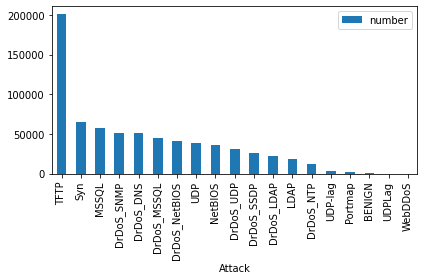

In [ ]:
# Visualize types of attacks and their quantities
import matplotlib.pyplot as plt

attacks_df_2019 = df_CICDDoS2019['label'].value_counts().to_frame().reset_index()
attacks_df_2019.rename(columns={"index": "attack", 1: "y", "label": "number"}, inplace = True)
attacks_df_2019.set_index('attack', inplace = True)
attacks_df_2019.plot (kind = "bar")
# attacks_df_2019.iloc[1:].plot (kind = "bar")
plt.xlabel('Attack')
plt.tight_layout()
plt.savefig('DDoS-attacks.png')


In [ ]:
# Check data types which exist across all columns
set(df_CICDDoS2019.dtypes)

{dtype('int64'), dtype('float64'), dtype('O')}

In [ ]:
# Group label column to fewer attack categories, according to [https://www.unb.ca/cic/datasets/ddos-2019.html]
# Code adapted from [https://pythonguides.com/pandas-replace-multiple-values/]
df_CICDDoS2019["label"] = df_CICDDoS2019["label"].replace(dict.fromkeys(['TFTP', 'DrDoS_NTP'], 'UDP Reflection Attack'))
df_CICDDoS2019["label"] = df_CICDDoS2019["label"].replace(dict.fromkeys(['DrDoS_DNS', 'DrDoS_LDAP', 'LDAP', 'DrDoS_NetBIOS', 'NetBIOS', 'DrDoS_SNMP', 'Portmap'], 'TCP/UDP Reflection Attack'))
df_CICDDoS2019["label"] = df_CICDDoS2019["label"].replace(dict.fromkeys(['MSSQL', 'DrDoS_MSSQL', 'DrDoS_SSDP' ], 'TCP Reflection Attack'))
df_CICDDoS2019["label"] = df_CICDDoS2019["label"].replace(dict.fromkeys(['Syn'], 'TCP Exploitation Attack'))
df_CICDDoS2019["label"] = df_CICDDoS2019["label"].replace(dict.fromkeys(['UDP', 'DrDoS_UDP', 'UDP-lag', 'UDPLag'], 'UDP Exploitation Attack'))


In [ ]:
# Display number of occurences of each unique value in the target varialble
df_CICDDoS2019['label'].value_counts()

TCP/UDP Reflection Attack    222634
UDP Reflection Attack        212877
TCP Reflection Attack        129207
UDP Exploitation Attack       73700
TCP Exploitation Attack       64733
BENIGN                         1114
WebDDoS                           2
Name: label, dtype: int64

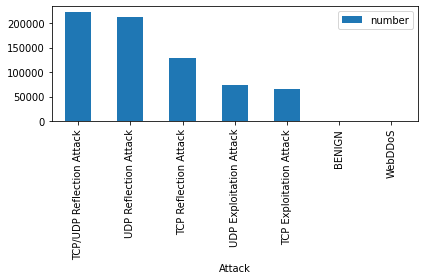

In [ ]:
# Visualize types of attacks and their quantities
import matplotlib.pyplot as plt

attacks_df_2019 = df_CICDDoS2019['label'].value_counts().to_frame().reset_index()
attacks_df_2019.rename(columns={"index": "attack", 1: "y", "label": "number"}, inplace = True)
attacks_df_2019.set_index('attack', inplace = True)
attacks_df_2019.plot (kind = "bar")
# attacks_df_2019.iloc[1:].plot (kind = "bar")
plt.xlabel('Attack')
plt.tight_layout()
plt.savefig('DDoS-attacks-categories.png')

In [ ]:
# Check data types which exist across all columns
set(df_CICDDoS2019.dtypes)

{dtype('int64'), dtype('float64'), dtype('O')}

In [ ]:
# Remove infinite values by changing them to nan. Adapted from https://stackoverflow.com/questions/17477979/dropping-infinite-values-from-dataframes-in-pandas
df_CICDDoS2019.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
# Check for nan values
df_CICDDoS2019.isnull().sum().sort_values(ascending = False)

flow_packets_s          21720
flow_bytes_s            21720
ece_flag_count              0
fwd_avg_bulk_rate           0
fwd_avg_packets_bulk        0
                        ...  
fwd_iat_std                 0
fwd_iat_mean                0
fwd_iat_total               0
flow_iat_min                0
label                       0
Length: 88, dtype: int64

In [ ]:
# Drop all rows with missing values and check missing values

df_CICDDoS2019.dropna(inplace = True)
df_CICDDoS2019.isnull().sum().sort_values(ascending = False)

unnamed_0               0
flow_id                 0
fwd_avg_packets_bulk    0
fwd_avg_bytes_bulk      0
fwd_header_length_1     0
                       ..
fwd_iat_total           0
flow_iat_min            0
flow_iat_max            0
flow_iat_std            0
label                   0
Length: 88, dtype: int64

In [ ]:
# Remove WebDDoS from label column in dataset since it will create too small a sample
df_CICDDoS2019 = df_CICDDoS2019[df_CICDDoS2019.label != 'WebDDoS']

In [ ]:
# Sample dataset randomly
# code adapted from [https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/]
# import library
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable

# fit predictor and target variable
x = df_CICDDoS2019.loc[:, df_CICDDoS2019.columns != 'label']
y = df_CICDDoS2019.loc[:, df_CICDDoS2019.columns == 'label']
x_rus, y_rus = rus.fit_resample(x, y)



In [ ]:
df_CICDDoS2019 = pd.concat([x_rus,y_rus], axis = 1)


In [ ]:
#Check number of unique values in the label column
df_CICDDoS2019['label'].value_counts()

BENIGN                       1108
TCP Exploitation Attack      1108
TCP Reflection Attack        1108
TCP/UDP Reflection Attack    1108
UDP Exploitation Attack      1108
UDP Reflection Attack        1108
Name: label, dtype: int64

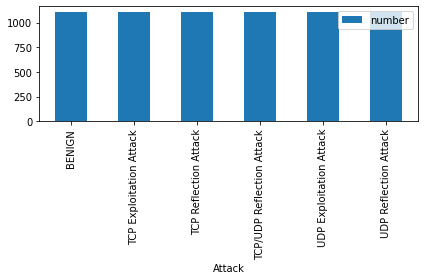

In [ ]:
# Visualize types of attacks and their quantities
import matplotlib.pyplot as plt

attacks_df_2019 = df_CICDDoS2019['label'].value_counts().to_frame().reset_index()
attacks_df_2019.rename(columns={"index": "attack", 1: "y", "label": "number"}, inplace = True)
attacks_df_2019.set_index('attack', inplace = True)
attacks_df_2019.plot (kind = "bar")
# attacks_df_2019.iloc[1:].plot (kind = "bar")
plt.xlabel('Attack')
plt.tight_layout()
plt.savefig('DDoS-attacks-sampled.png')

## Data Normalization and Feature Selection

In [ ]:
# Check which columns have data types as integer, float and object respectively
df_CICDDoS2019.columns.to_series().groupby(df_CICDDoS2019.dtypes).groups

{int64: ['unnamed_0', 'source_port', 'destination_port', 'protocol', 'flow_duration', 'total_fwd_packets', 'total_backward_packets', 'fwd_psh_flags', 'bwd_psh_flags', 'fwd_urg_flags', 'bwd_urg_flags', 'fwd_header_length', 'bwd_header_length', 'fin_flag_count', 'syn_flag_count', 'rst_flag_count', 'psh_flag_count', 'ack_flag_count', 'urg_flag_count', 'cwe_flag_count', 'ece_flag_count', 'fwd_header_length_1', 'fwd_avg_bytes_bulk', 'fwd_avg_packets_bulk', 'fwd_avg_bulk_rate', 'bwd_avg_bytes_bulk', 'bwd_avg_packets_bulk', 'bwd_avg_bulk_rate', 'subflow_fwd_packets', 'subflow_fwd_bytes', 'subflow_bwd_packets', 'subflow_bwd_bytes', 'init_win_bytes_forward', 'init_win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward', 'inbound'], float64: ['total_length_of_fwd_packets', 'total_length_of_bwd_packets', 'fwd_packet_length_max', 'fwd_packet_length_min', 'fwd_packet_length_mean', 'fwd_packet_length_std', 'bwd_packet_length_max', 'bwd_packet_length_min', 'bwd_packet_length_mean', 'bwd_packe

In [ ]:
# Count Number of Unique values in each object column
columns1 = ['flow_id', 'source_ip', 'destination_ip', 'timestamp', 'simillar_http']
for column in columns1:
 print("Number of unique values in " + column + " = " + str(df_CICDDoS2019[column].nunique()))

Number of unique values in flow_id = 6584
Number of unique values in source_ip = 144
Number of unique values in destination_ip = 259
Number of unique values in timestamp = 6621
Number of unique values in simillar_http = 26


In [ ]:
# drop timestamp and flow_id columns since they are too many to be encoded
df_CICDDoS2019.drop(columns = ['timestamp', 'flow_id'], inplace = True)

In [ ]:
# Label encode the remaining object columns
# Adapted from [https://pbpython.com/categorical-encoding.html]

string_cols = ['source_ip', 'destination_ip', 'simillar_http']

for col in string_cols:
  df_CICDDoS2019[col] = df_CICDDoS2019[col].astype('category')
  df_CICDDoS2019[col] = df_CICDDoS2019[col].cat.codes



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


[2.34309370e-02 3.89478382e-02 4.84779265e-02 2.59812082e-02
 1.60662134e-02 3.12814821e-02 8.43133273e-03 3.34580918e-03
 1.90753305e-03 1.45665562e-02 1.64715226e-04 4.09733363e-02
 6.70909418e-02 6.38016378e-02 1.92640247e-03 1.07134852e-03
 4.04736145e-03 2.71329749e-03 4.31776005e-04 1.96895239e-02
 9.21160291e-03 1.09732214e-02 1.03240263e-02 9.60810998e-03
 2.47677962e-03 5.15210111e-03 7.49248898e-03 9.10709826e-03
 7.73138158e-03 2.67053817e-03 9.15282598e-05 9.91208557e-05
 2.55807979e-04 2.21164142e-04 8.63319777e-04 1.72968315e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.50997819e-03
 5.44702100e-04 9.05302543e-03 3.46723840e-04 6.92629110e-02
 5.27695034e-02 7.30083894e-02 7.68706777e-03 1.32321085e-03
 0.00000000e+00 6.25592353e-06 1.85768258e-03 0.00000000e+00
 5.71493265e-02 1.82656079e-02 6.43942788e-03 0.00000000e+00
 6.75096019e-03 4.67044269e-02 5.39749293e-02 2.87315716e-03
 4.68400120e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

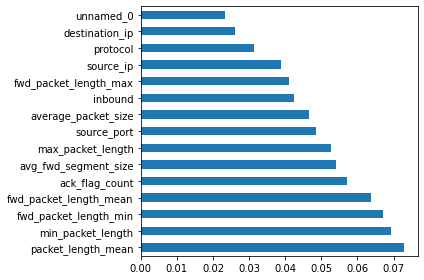

In [ ]:
# separate target and features
# code adapted from [https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e]

y = df_CICDDoS2019.loc[:, df_CICDDoS2019.columns == 'label']
X = df_CICDDoS2019.loc[:, df_CICDDoS2019.columns != 'label']

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

plt.tight_layout()
plt.savefig('DDoS-feature importance.png')
plt.show()

In [ ]:
feature_columns = list(dict(feat_importances.nlargest(10)).keys())

In [ ]:
# separate target and features

cicddos2019_target = np.asarray(df_CICDDoS2019.loc[:, df_CICDDoS2019.columns == 'label'])
cicddos2019_features = np.asarray(df_CICDDoS2019[feature_columns])

In [ ]:
# Normalize features using standard scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_cicddos2019_features = scaler.fit_transform(cicddos2019_features)

scaled_cicddos2019_features

array([[-0.9588255 , -0.92958003, -0.92975279, ...,  0.92910801,
        -0.91673686, -2.54355321],
       [ 0.26248477, -0.92958003, -0.92975279, ...,  0.83918427,
        -0.10275076, -2.54355321],
       [-0.96660945, -0.92958003, -0.92975279, ...,  0.61096142,
        -0.92216184, -2.54355321],
       ...,
       [ 0.24384722,  0.26742475,  0.26735312, ...,  1.06832856,
         0.0844333 ,  0.39315081],
       [ 0.24384722,  0.26742475,  0.26735312, ...,  1.06828668,
         0.0844333 ,  0.39315081],
       [ 0.24384722,  0.26742475,  0.26735312, ...,  1.06887304,
         0.28575232,  0.39315081]])

## Split Data

In [ ]:
# Split data into training and testing splits 
from sklearn.model_selection import train_test_split

X = scaled_cicddos2019_features
y = np.ravel(cicddos2019_target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

# Models

## CatBoost Classifier

In [ ]:
# [Adapted from https://towardsdatascience.com/mastering-fast-gradient-boosting-on-google-colaboratory-with-free-gpu-65c1dd47d1c5] 
#Create a Gaussian Classifier
import time
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
clf= CatBoostClassifier(iterations = 100, learning_rate = 0.03,task_type='CPU')

st_train = time.time()
#Train the model using the training sets
clf.fit(X_train,y_train)
et_train = time.time()

print("Training time = " + str(et_train-st_train) + " seconds")

st_test = time.time()

y_pred=clf.predict(X_test)

et_test = time.time()

print("Testing time = " + str(et_test-st_test) + " seconds")

y_unique = list(np.unique(y_test))

print(classification_report(y_test, y_pred, labels=y_unique))

cm = confusion_matrix(y_test, y_pred)

0:	learn: 1.6725260	total: 79.4ms	remaining: 7.86s
1:	learn: 1.5757103	total: 95.8ms	remaining: 4.69s
2:	learn: 1.4841201	total: 113ms	remaining: 3.66s
3:	learn: 1.4026515	total: 127ms	remaining: 3.06s
4:	learn: 1.3333020	total: 154ms	remaining: 2.93s
5:	learn: 1.2696595	total: 177ms	remaining: 2.77s
6:	learn: 1.2149583	total: 209ms	remaining: 2.78s
7:	learn: 1.1627061	total: 226ms	remaining: 2.59s
8:	learn: 1.1136266	total: 267ms	remaining: 2.7s
9:	learn: 1.0690727	total: 299ms	remaining: 2.69s
10:	learn: 1.0290734	total: 332ms	remaining: 2.69s
11:	learn: 0.9908818	total: 344ms	remaining: 2.52s
12:	learn: 0.9547359	total: 359ms	remaining: 2.4s
13:	learn: 0.9196933	total: 371ms	remaining: 2.27s
14:	learn: 0.8878174	total: 382ms	remaining: 2.16s
15:	learn: 0.8581960	total: 405ms	remaining: 2.13s
16:	learn: 0.8290016	total: 426ms	remaining: 2.08s
17:	learn: 0.8018229	total: 453ms	remaining: 2.06s
18:	learn: 0.7764216	total: 470ms	remaining: 2s
19:	learn: 0.7532946	total: 487ms	remaining:

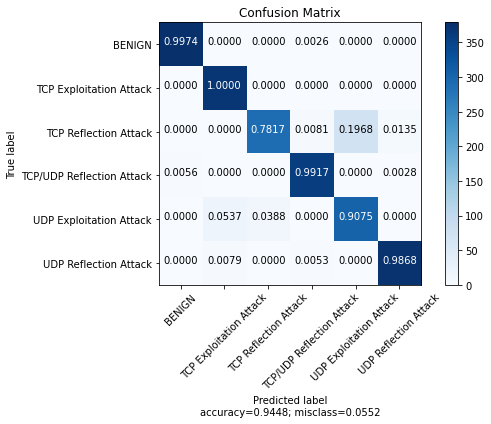

In [ ]:
# code adapted from [http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html]
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))


plot_confusion_matrix(cm = cm, target_names = y_unique, title = 'Confusion Matrix')
plt.tight_layout()
plt.savefig('DDoS catboost confusion matrix.png')
plt.show()

## K-Nearest Neighbour

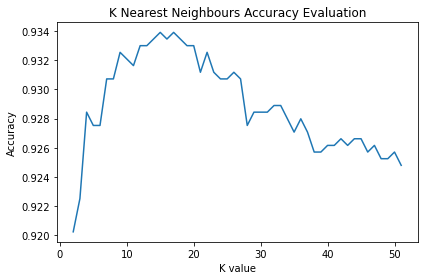

Optimum value: k =  15
Training time = 0.011825799942016602 seconds
Testing time = 0.039046525955200195 seconds
The classification report for the training set is: 

                           precision    recall  f1-score   support

                   BENIGN       0.99      1.00      1.00       380
  TCP Exploitation Attack       0.95      1.00      0.97       369
    TCP Reflection Attack       0.92      0.74      0.82       371
TCP/UDP Reflection Attack       0.99      1.00      0.99       360
  UDP Exploitation Attack       0.79      0.88      0.83       335
    UDP Reflection Attack       0.96      0.98      0.97       379

                 accuracy                           0.93      2194
                macro avg       0.93      0.93      0.93      2194
             weighted avg       0.94      0.93      0.93      2194

The confusion matrix for the training set is:



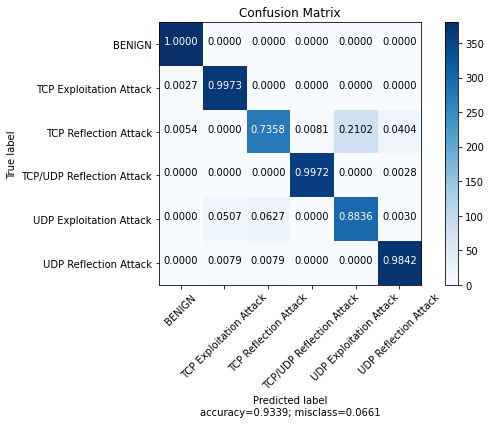

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# Create arrays with zeros to store accuracy data.
accuracy_array = np.zeros(50)
k_array = np.zeros(50)

# Loop through models with increasing values of n_neighbours
for k in np.arange(50):
    clf_kNN = KNeighborsClassifier(n_neighbors=k+2, weights='distance')
    clf_kNN.fit(X_train, y_train)
    y_pred=clf_kNN.predict(X_test)

    # Store accuracy in an array
    accuracy_array[k] = accuracy_score(y_test, y_pred)
    k_array[k] = k+2

# Plot accuracy against n_neighbours value.  
plt.plot(k_array, accuracy_array)
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.title('K Nearest Neighbours Accuracy Evaluation')
plt.tight_layout()
plt.savefig('DDOS-KNN-parameters.png')
plt.show()

print("Optimum value: k = ", list(accuracy_array).index(max(accuracy_array))+2)
    
# Use the n_neighbours value with the highest accuracy to make the final model.
clf_kNN = KNeighborsClassifier(n_neighbors=list(accuracy_array).index(max(accuracy_array))+2, weights='distance')
st_train = time.time()
clf_kNN.fit(X_train, y_train)
et_train = time.time()

print("Training time = " + str(et_train-st_train) + " seconds")
st_test = time.time()
y_pred=clf_kNN.predict(X_test)
et_test = time.time()

print("Testing time = " + str(et_test-st_test) + " seconds")
y_conf=clf_kNN.predict_proba(X_test)

# Get classification report of the model.

print('The classification report for the training set is: \n')
print(classification_report(y_test, y_pred, labels=y_unique))
print('The confusion matrix for the training set is:\n')
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm = cm, target_names = y_unique, title = 'Confusion Matrix')
plt.tight_layout()
plt.savefig('DDoS KNN confusion matrix.png')
plt.show()


## Stochastic Gradient Descent

Training time = 0.061919450759887695 seconds
Testing time = 0.001981973648071289 seconds
The classification report for the training set is: 

                           precision    recall  f1-score   support

                   BENIGN       0.99      0.99      0.99       380
  TCP Exploitation Attack       0.95      1.00      0.97       369
    TCP Reflection Attack       0.51      0.75      0.61       371
TCP/UDP Reflection Attack       0.95      0.99      0.97       360
  UDP Exploitation Attack       0.68      0.56      0.61       335
    UDP Reflection Attack       0.89      0.54      0.67       379

                 accuracy                           0.81      2194
                macro avg       0.83      0.81      0.80      2194
             weighted avg       0.83      0.81      0.81      2194

The confusion matrix for the training set is:



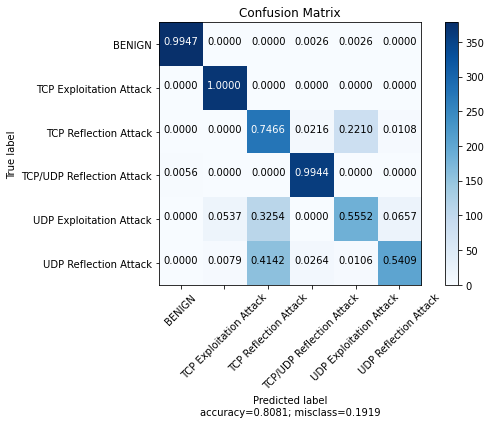

In [ ]:
from sklearn.linear_model import SGDClassifier
clf_sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000)
st_train = time.time()
clf_sgd.fit(X_train, y_train)
et_train = time.time()
print("Training time = " + str(et_train-st_train) + " seconds")

st_test = time.time()
y_pred=clf_sgd.predict(X_test)
et_test = time.time()
print("Testing time = " + str(et_test-st_test) + " seconds")

print('The classification report for the training set is: \n')
print(classification_report(y_test, y_pred, labels=y_unique))
print('The confusion matrix for the training set is:\n')
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm = cm, target_names = y_unique, title = 'Confusion Matrix')
plt.tight_layout()
plt.savefig('DDoS SGD confusion matrix.png')
plt.show()

## SVM

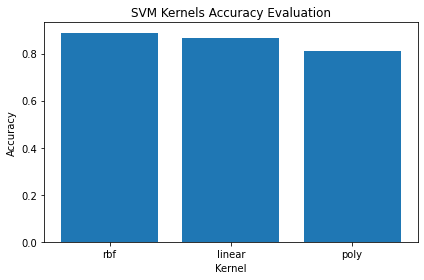

Best model =  rbf
Training time = 1.1317968368530273 seconds
Testing time = 0.2320268154144287 seconds
The classification report for the training set is: 

                           precision    recall  f1-score   support

                   BENIGN       0.99      0.99      0.99       380
  TCP Exploitation Attack       0.95      1.00      0.97       369
    TCP Reflection Attack       0.76      0.60      0.67       371
TCP/UDP Reflection Attack       0.99      0.98      0.99       360
  UDP Exploitation Attack       0.76      0.91      0.83       335
    UDP Reflection Attack       0.86      0.84      0.85       379

                 accuracy                           0.89      2194
                macro avg       0.89      0.89      0.88      2194
             weighted avg       0.89      0.89      0.88      2194

The confusion matrix for the training set is:



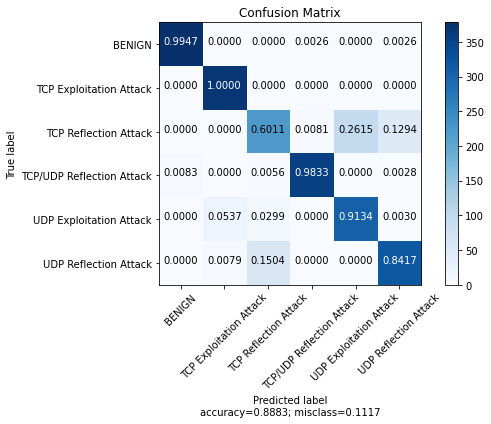

In [ ]:
from sklearn.svm import SVC
from sklearn import svm

kernels = ['rbf', 'linear', 'poly']

# Create array with zeros to store accuracy data.
accuracy_array = np.zeros(3)

# Loop through models with different types of kernels
for i, kernel in enumerate(kernels):
    model = svm.SVC(kernel=kernel)
    clf_svm = model.fit(X_train, y_train)
    y_pred=clf_svm.predict(X_test)
    accuracy_array[i] = accuracy_score(y_test, y_pred)

# Plot bar graph of accuracy of different kernels
plt.bar(kernels, accuracy_array)
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('SVM Kernels Accuracy Evaluation')
plt.tight_layout()
plt.savefig('DDOS-SVM-parameters.png')
plt.show()

# Take the best kernel and use it to make the final SVM model 
print("Best model = ", kernels[list(accuracy_array).index(max(accuracy_array))])
model = svm.SVC(kernel=kernels[list(accuracy_array).index(max(accuracy_array))], probability = True)
st_train = time.time()
clf_svm = model.fit(X_train, y_train)
et_train = time.time()

print("Training time = " + str(et_train-st_train) + " seconds")

st_test = time.time()
y_pred=clf_svm.predict(X_test)
et_test = time.time()
print("Testing time = " + str(et_test-st_test) + " seconds")

print('The classification report for the training set is: \n')
print(classification_report(y_test, y_pred, labels=y_unique))
print('The confusion matrix for the training set is:\n')
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm = cm, target_names = y_unique, title = 'Confusion Matrix')
plt.tight_layout()
plt.savefig('DDoS SVM confusion matrix.png')
plt.show()


## AdaBoost

Training time = 2.2830936908721924 seconds
Testing time = 0.08134150505065918 seconds
The classification report for the training set is: 

                           precision    recall  f1-score   support

                   BENIGN       1.00      0.99      1.00       380
  TCP Exploitation Attack       0.95      1.00      0.97       369
    TCP Reflection Attack       0.97      0.81      0.88       371
TCP/UDP Reflection Attack       0.98      1.00      0.99       360
  UDP Exploitation Attack       0.82      0.92      0.87       335
    UDP Reflection Attack       1.00      0.99      0.99       379

                 accuracy                           0.95      2194
                macro avg       0.95      0.95      0.95      2194
             weighted avg       0.96      0.95      0.95      2194

The confusion matrix for the training set is:



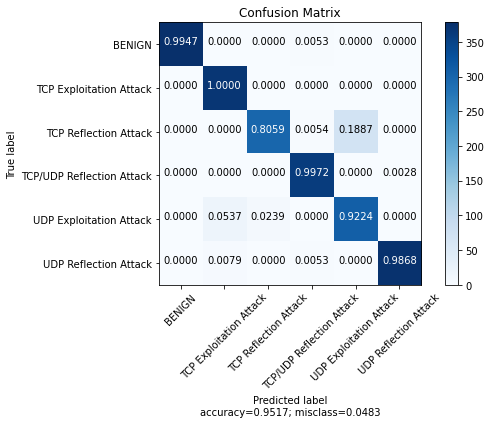

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Create AdaBoost classifier model with decision tree as base estimator
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=1)
clf_A = AdaBoostClassifier(n_estimators=100, random_state=0,
                                   base_estimator=dtree,
                                   learning_rate=0.0005,
                                   algorithm = 'SAMME')

st_train = time.time()
clf_A.fit(X_train, y_train)
et_train = time.time()

print("Training time = " + str(et_train-st_train) + " seconds")

st_test = time.time()
y_pred = clf_A.predict(X_test)
et_test = time.time()

print("Testing time = " + str(et_test-st_test) + " seconds")

print('The classification report for the training set is: \n')
print(classification_report(y_test, y_pred, labels=y_unique))
print('The confusion matrix for the training set is:\n')
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm = cm, target_names = y_unique, title = 'Confusion Matrix')
plt.tight_layout()
plt.savefig('DDoS AdaBoost confusion matrix.png')
plt.show()


## Decision Tree

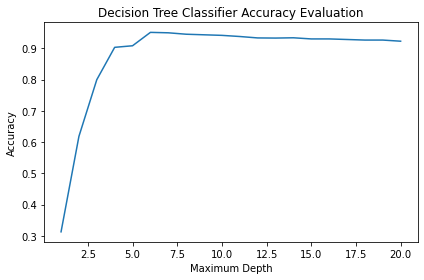

Optimum value: max depth =  6
Training time = 0.027524709701538086 seconds
Testing time = 0.0017042160034179688 seconds
The classification report for the training set is: 

                           precision    recall  f1-score   support

                   BENIGN       1.00      0.99      1.00       380
  TCP Exploitation Attack       0.95      1.00      0.97       369
    TCP Reflection Attack       0.97      0.80      0.88       371
TCP/UDP Reflection Attack       0.99      1.00      0.99       360
  UDP Exploitation Attack       0.81      0.92      0.86       335
    UDP Reflection Attack       1.00      0.98      0.99       379

                 accuracy                           0.95      2194
                macro avg       0.95      0.95      0.95      2194
             weighted avg       0.95      0.95      0.95      2194

The confusion matrix for the training set is:



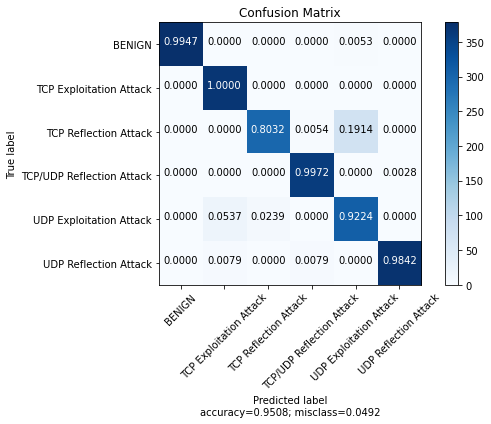

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Create zero arrays to store accuracy and depth values.
accuracy_array = np.zeros(20)
depth_array = np.zeros(20)

# Loop through models with different values of max_depth
for depth in np.arange(20):
    model_tree = DecisionTreeClassifier(criterion='entropy',random_state=0, max_depth=depth+1, min_samples_leaf=2)
    model_tree.fit(X_train,y_train) 
    y_pred = model_tree.predict(X_test)
    # Store accuracy and depth values in arrats
    depth_array[depth] = depth + 1
    accuracy_array[depth] = accuracy_score(y_test, y_pred)

# Plot accuracy against max_depth 
plt.plot(depth_array, accuracy_array)
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Classifier Accuracy Evaluation')
plt.tight_layout()
plt.savefig('DDOS-Dtree-parameters.png')
plt.show()

# Obtain best depth.
good_depth = list(accuracy_array).index(max(accuracy_array))+1

print("Optimum value: max depth = ", good_depth)

# Create final decision tree model using best depth
model_tree = DecisionTreeClassifier(criterion='entropy',random_state=0, max_depth=good_depth, min_samples_leaf=2)
st_train = time.time()
model_tree.fit(X_train,y_train) 
et_train = time.time()

print("Training time = " + str(et_train-st_train) + " seconds")

st_test = time.time()
y_pred = model_tree.predict(X_test)
et_test = time.time()
print("Testing time = " + str(et_test-st_test) + " seconds")

# Get classification report and confusion matrix
print('The classification report for the training set is: \n')
print(classification_report(y_test, y_pred, labels=y_unique))
print('The confusion matrix for the training set is:\n')
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm = cm, target_names = y_unique, title = 'Confusion Matrix')
plt.tight_layout()
plt.savefig('DDoS Dtree confusion matrix.png')
plt.show()




## Random Forest 

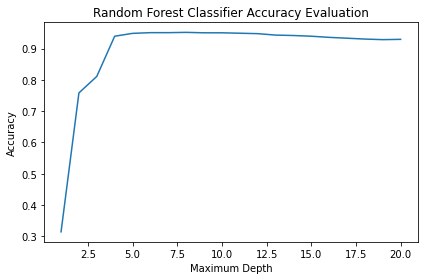

Optimum value: max depth =  8


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Create zero arrays to store accuracy and depth values.
accuracy_array = np.zeros(20)
depth_array = np.zeros(20)

# Loop through models with different values of max_depth
for depth in np.arange(20):
    clf_rf = RandomForestClassifier(random_state=0, max_depth=depth+1)
    clf_rf.fit(X_train,y_train) 
    y_pred = clf_rf.predict(X_test)
    # Store accuracy and depth values in arrays
    depth_array[depth] = depth + 1
    accuracy_array[depth] = accuracy_score(y_test, y_pred)

# Plot accuracy against max_depth 
plt.plot(depth_array, accuracy_array)
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.title('Random Forest Classifier Accuracy Evaluation')
plt.tight_layout()
plt.savefig('DDOS-RF-parameters.png')
plt.show()

# Obtain best depth.
good_depth = list(accuracy_array).index(max(accuracy_array))+1

print("Optimum value: max depth = ", good_depth)

Training time = 0.4151642322540283 seconds
Training time = 0.038477182388305664 seconds
The classification report for the training set is: 

                           precision    recall  f1-score   support

                   BENIGN       1.00      1.00      1.00       380
  TCP Exploitation Attack       0.95      1.00      0.97       369
    TCP Reflection Attack       0.97      0.80      0.88       371
TCP/UDP Reflection Attack       0.99      1.00      1.00       360
  UDP Exploitation Attack       0.81      0.92      0.86       335
    UDP Reflection Attack       1.00      0.99      0.99       379

                 accuracy                           0.95      2194
                macro avg       0.95      0.95      0.95      2194
             weighted avg       0.96      0.95      0.95      2194

The confusion matrix for the training set is:



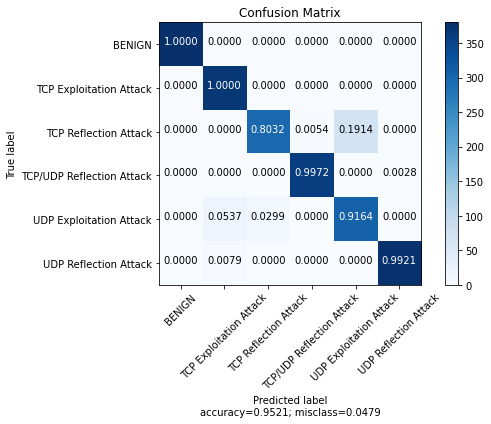

In [ ]:


clf_rf = RandomForestClassifier(max_depth=good_depth, random_state=0)
st_train = time.time()
clf_rf.fit(X_train,y_train) 
et_train = time.time()

print("Training time = " + str(et_train-st_train) + " seconds")

st_test = time.time()
y_pred = clf_rf.predict(X_test)
et_test = time.time()

print("Training time = " + str(et_test-st_test) + " seconds")

# Get classification report and confusion matrix
print('The classification report for the training set is: \n')
print(classification_report(y_test, y_pred, labels=y_unique))
print('The confusion matrix for the training set is:\n')
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm = cm, target_names = y_unique, title = 'Confusion Matrix')
plt.tight_layout()
plt.savefig('DDoS RF confusion matrix.png')
plt.show()

## Naive Bayes

Training time = 0.010885953903198242 seconds
Testing time = 0.0035855770111083984 seconds
The classification report for the training set is: 

                           precision    recall  f1-score   support

                   BENIGN       0.99      0.99      0.99       380
  TCP Exploitation Attack       0.95      1.00      0.97       369
    TCP Reflection Attack       0.30      0.21      0.25       371
TCP/UDP Reflection Attack       0.98      0.59      0.73       360
  UDP Exploitation Attack       0.82      0.73      0.77       335
    UDP Reflection Attack       0.57      0.97      0.72       379

                 accuracy                           0.75      2194
                macro avg       0.77      0.75      0.74      2194
             weighted avg       0.77      0.75      0.74      2194

The confusion matrix for the training set is:



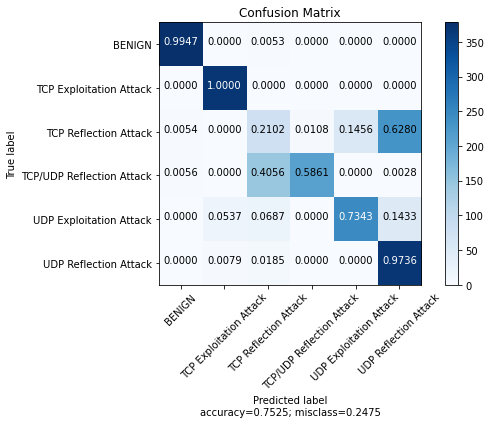

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

st_train = time.time()
gnb.fit(X_train,y_train) 
et_train = time.time()

print("Training time = " + str(et_train-st_train) + " seconds")

st_test = time.time()
y_pred = gnb.predict(X_test)
et_test = time.time()

print("Testing time = " + str(et_test-st_test) + " seconds")

# Get classification report and confusion matrix
print('The classification report for the training set is: \n')
print(classification_report(y_test, y_pred, labels=y_unique))
print('The confusion matrix for the training set is:\n')
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm = cm, target_names = y_unique, title = 'Confusion Matrix')
plt.tight_layout()
plt.savefig('DDoS GNB confusion matrix.png')
plt.show()


## MLP

In [ ]:

from sklearn.neural_network import MLPClassifier

# separate target and features

cicddos2019_target = np.asarray(df_CICDDoS2019.loc[:, df_CICDDoS2019.columns == 'label'])
cicddos2019_features = np.asarray(df_CICDDoS2019.loc[:, df_CICDDoS2019.columns != 'label'])

# Normalize features using standard scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_cicddos2019_features = scaler.fit_transform(cicddos2019_features)

scaled_cicddos2019_features

# Split data into training and testing splits 
from sklearn.model_selection import train_test_split

X = scaled_cicddos2019_features
y = np.ravel(cicddos2019_target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



Training time = 23.7719247341156 seconds
Testing time = 0.018898725509643555 seconds
The classification report for the training set is: 

                           precision    recall  f1-score   support

                   BENIGN       1.00      1.00      1.00       380
  TCP Exploitation Attack       0.98      1.00      0.99       369
    TCP Reflection Attack       0.92      0.77      0.84       371
TCP/UDP Reflection Attack       0.99      1.00      0.99       360
  UDP Exploitation Attack       0.79      0.95      0.86       335
    UDP Reflection Attack       0.98      0.96      0.97       379

                 accuracy                           0.94      2194
                macro avg       0.95      0.94      0.94      2194
             weighted avg       0.95      0.94      0.94      2194

The confusion matrix for the training set is:



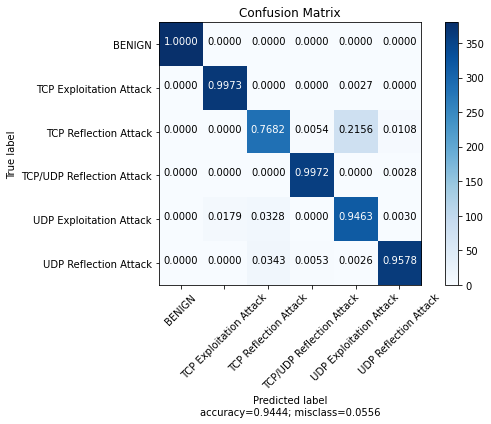

In [ ]:
#Initializing the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)


#Fitting the training data to the network
st_train = time.time()
mlp.fit(X_train, y_train)
et_train = time.time()

print("Training time = " + str(et_train-st_train) + " seconds")

st_test = time.time()
y_pred = mlp.predict(X_test)
et_test = time.time()

print("Testing time = " + str(et_test-st_test) + " seconds")

# Get classification report and confusion matrix
print('The classification report for the training set is: \n')
print(classification_report(y_test, y_pred, labels=y_unique))
print('The confusion matrix for the training set is:\n')
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm = cm, target_names = y_unique, title = 'Confusion Matrix')
plt.tight_layout()
plt.savefig('DDoS MLP confusion matrix.png')
plt.show()